***Лабораториска вежба 2 - Живче Глгиров 216139***


**Importing dependencies**

In [65]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [59]:
data = datasets.fetch_california_housing()

**Familiarity with the dataset and preprocessing.**

In [60]:
print("Number of instances: ", data.data.shape[0])
print("Number of attributes: ", data.data.shape[1])
print("Feature names: ", data.feature_names)


Number of instances:  20640
Number of attributes:  8
Feature names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [32]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


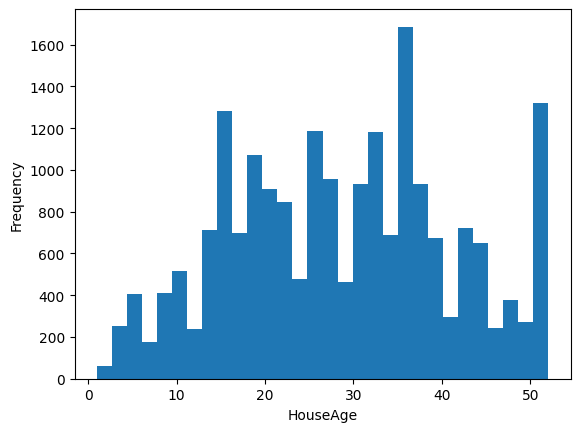

In [44]:
feature = 'HouseAge'
plt.hist(df[feature], bins=30)
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()


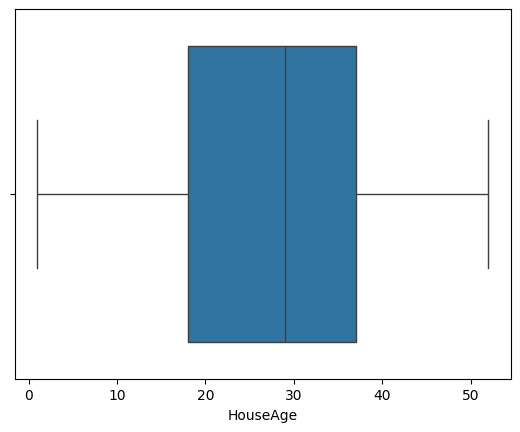

In [45]:
sns.boxplot(x=df[feature])
plt.show()

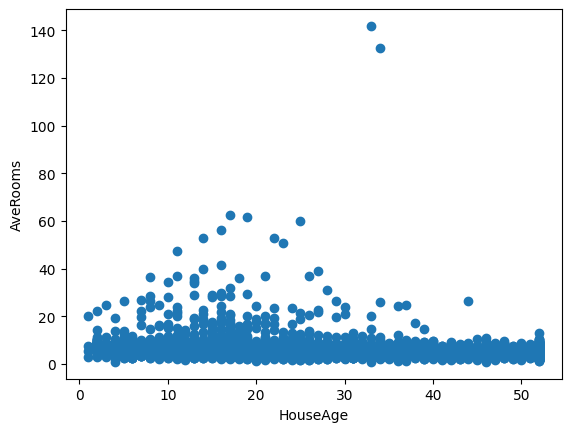

In [46]:
plt.scatter(df[feature], df['AveRooms'])
plt.xlabel(feature)
plt.ylabel('AveRooms')
plt.show()

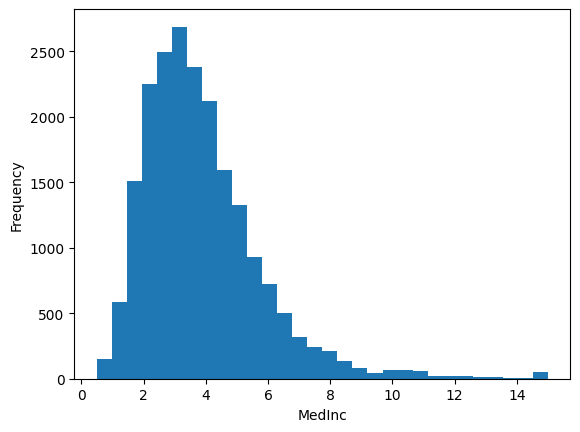

In [47]:
feature = 'MedInc'
plt.hist(df[feature], bins=30)
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

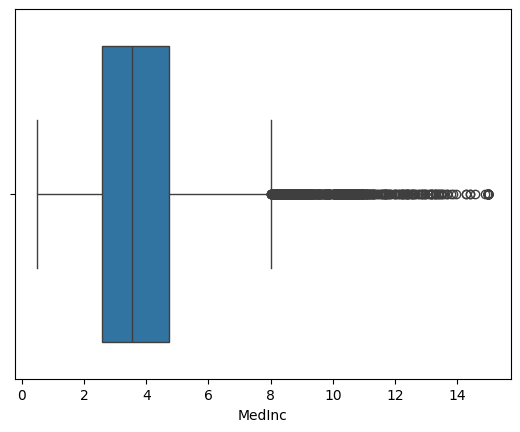

In [48]:
sns.boxplot(x=df[feature])
plt.show()


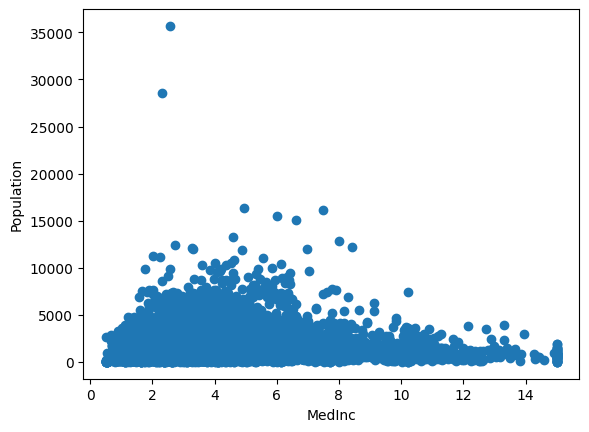

In [49]:
plt.scatter(df[feature], df['Population'])
plt.xlabel(feature)
plt.ylabel('Population')
plt.show()


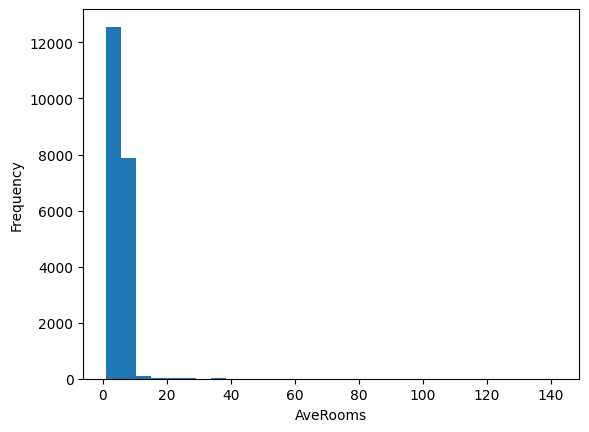

In [51]:
feature = 'AveRooms'
plt.hist(df[feature], bins=30)
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

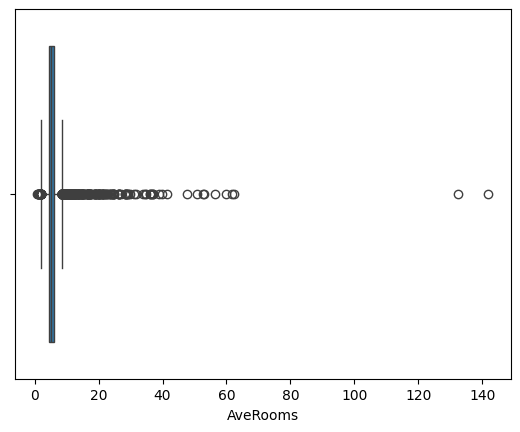

In [52]:
sns.boxplot(x=df[feature])
plt.show()


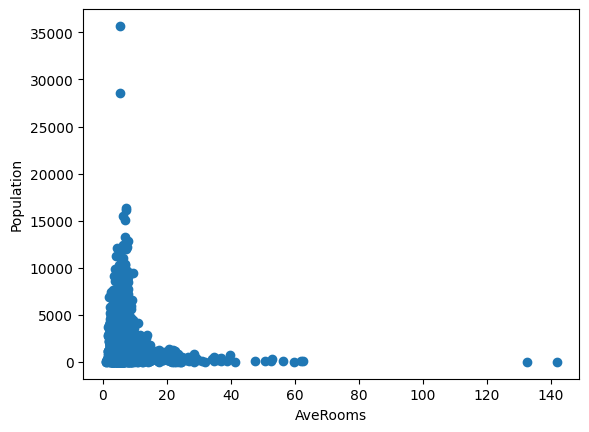

In [53]:
plt.scatter(df[feature], df['Population'])
plt.xlabel(feature)
plt.ylabel('Population')
plt.show()


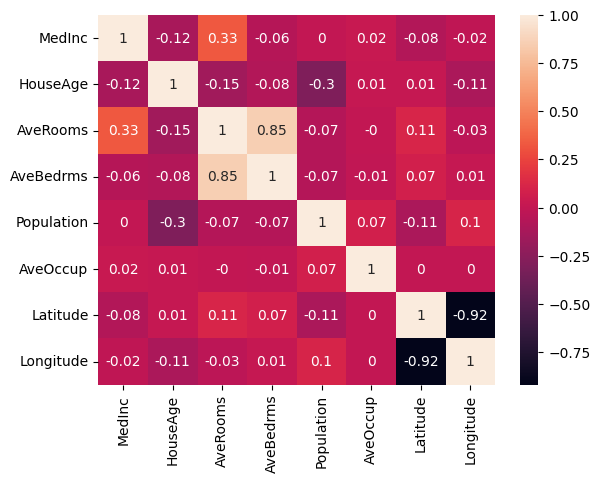

In [54]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


**Splitting the training data and test sets**

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


**Initialization of models**

In [64]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": LassoCV(),
    "ElasticNet": ElasticNet(),
    "BayesianRidge": BayesianRidge()
}

**Training and testing the models**

In [69]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} MSE: {mse}")

LinearRegression MSE: 0.5558915986952422
Ridge MSE: 0.5550405540329947
Lasso MSE: 0.5555752649052167
ElasticNet MSE: 0.7645556403971131
BayesianRidge MSE: 0.5555863660255022


In [70]:
for name, model in models.items():
    if name in ["Ridge", "Lasso"]:
        print(f"{name} alpha: {model.alpha_}")


Ridge alpha: 10.0
Lasso alpha: 0.034222561573497685


**Заклучок:**


Според овие резултати, Ridge моделот има поголема вредност за alpha во споредба со Lasso моделот, што значи дека Ridge моделот има поголема регуларизација.
